In [1]:
import pandas as pd


In [2]:
# load the dataset
df = pd.read_csv("heart_data.csv")

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


<Axes: ylabel='cholestrol'>

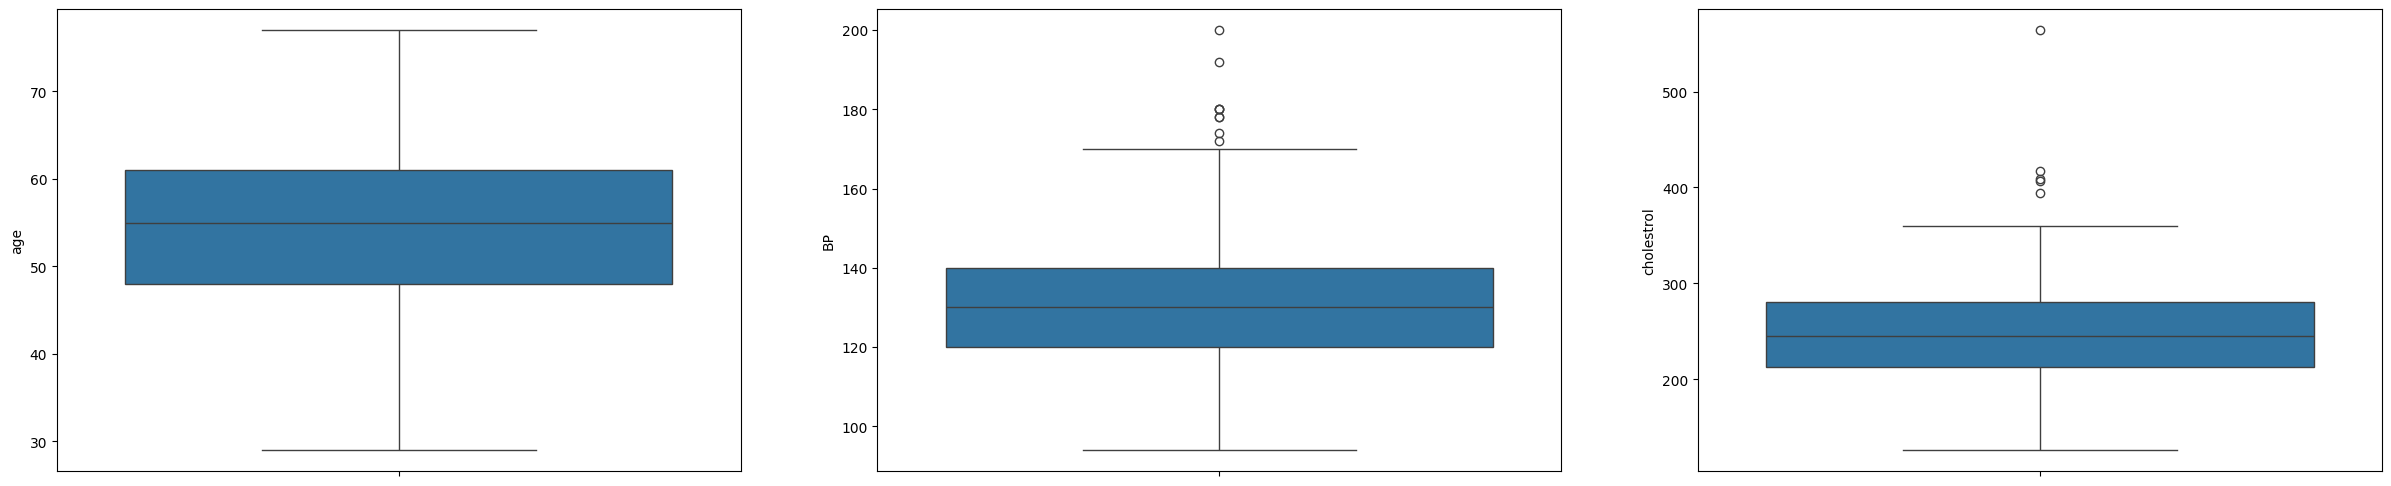

In [4]:
# check for the outliers
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(30,6)) # to decide/fix the size of the plot
plt.subplot(1,3,1)
sns.boxplot(df["age"])

plt.subplot(1,3,2)
sns.boxplot(df["BP"])

plt.subplot(1,3,3)
sns.boxplot(df["cholestrol"])

In [5]:
q1=df.describe()["BP"]["25%"]
q3=df.describe()["BP"]["75%"]
IQR = q3-q1
print(q1,q3,IQR)

120.0 140.0 20.0


In [6]:
# we found out outliers in BP and Cholestrol columns
# we fix the outliers using lower_limit and upper_limit
lower_limit = q1-1.5 * IQR
upper_limit = q3 + 1.5 * IQR
# q1 = 25%, q3 = 75%, IQR = q3-q1
print(lower_limit)
print(upper_limit)
# <90 will be replaced with 90
# >170 will be replaced with 170

90.0
170.0


In [7]:
df["BP"]=df["BP"].clip(lower_limit,upper_limit) # capping technique

<Axes: ylabel='BP'>

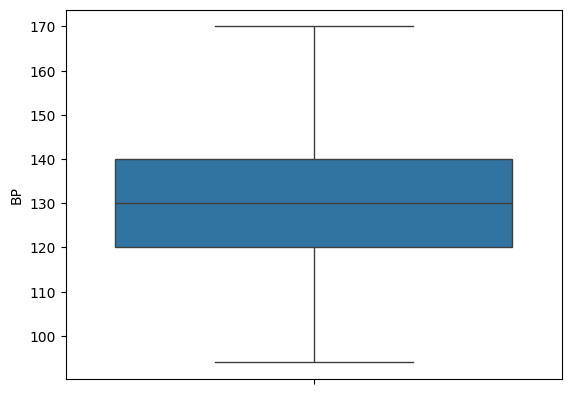

In [8]:
sns.boxplot(df["BP"])

In [9]:
q1=df.describe()["cholestrol"]["25%"]
q3=df.describe()["cholestrol"]["75%"]
IQR = q3-q1
print(q1,q3,IQR)

213.0 280.0 67.0


In [10]:
# we found out outliers in BP and Cholestrol columns
# we fix the outliers using lower_limit and upper_limit
lower_limit = q1-1.5 * IQR
upper_limit = q3 + 1.5 * IQR
# q1 = 25%, q3 = 75%, IQR = q3-q1
print(lower_limit)
print(upper_limit)
# <112.5 will be replaced with 112.5
# >380.5 will be replaced with 380.5

112.5
380.5


In [11]:
df["cholestrol"]=df["cholestrol"].clip(lower_limit,upper_limit) # capping technique

<Axes: ylabel='cholestrol'>

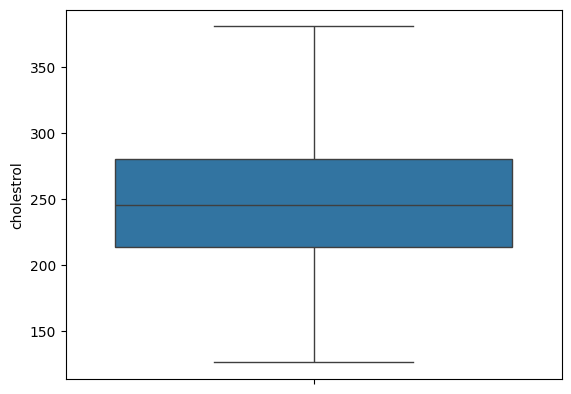

In [12]:
sns.boxplot(df["cholestrol"])

In [13]:
# encoding - do i need to apply encoding? no, because we don't have text data
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322.0,1
1,67,0,115,380.5,0
2,57,1,124,261.0,1
3,64,1,128,263.0,0
4,74,0,120,269.0,0


In [14]:
# Model Training
# feature scaling is done after we split the data into 80 and 20
# Separate Independent and dependent variable
X = df.drop(columns="heart disease") # independent variables - age, sex, BP, cholestrol
y = df["heart disease"] # heart disease

In [15]:
X.columns

Index(['age', 'sex', 'BP', 'cholestrol'], dtype='object')

In [16]:
# Split the data into 80 and 20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [17]:
# feature scaling - standardization or normalization?
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # creating an object here of StandardScaler class
data = ss.fit_transform(X_train)
# convert array into dataframe
X_trained_scaled=pd.DataFrame(data,columns = X_train.columns)

In [18]:
# when we scaled X_test we use transform not fit transform
data=ss.transform(X_test)
X_test_scaled = pd.DataFrame(data,columns= X_test.columns)

In [19]:
# Model Training - X_trained_scaled,y_train - 80
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
# we use fit function to train the data
log.fit(X_trained_scaled,y_train)

LogisticRegression()

In [20]:
# training is done, so we need to test the model
# Testing we use predict function - X_test_scaled
y_pred=log.predict(X_test_scaled) # model predicted values

In [21]:
y_test # my actual y_test values for X_test data

30     1
116    1
79     0
127    0
196    0
137    1
209    0
45     0
158    0
247    0
183    0
268    0
227    1
82     1
165    0
194    0
226    1
146    1
104    1
60     0
221    1
266    0
46     1
42     0
185    0
9      1
22     0
199    1
109    0
24     0
113    0
68     0
144    1
224    0
252    1
6      1
120    1
67     1
119    1
118    0
25     0
125    0
244    0
19     0
77     0
216    0
90     0
208    1
93     1
180    0
15     0
152    0
232    0
250    1
Name: heart disease, dtype: int64

In [22]:
# to evaluate the model's performance we use accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix

In [23]:
confusion_matrix(y_test,y_pred)

array([[27,  6],
       [10, 11]])

In [24]:
accuracy_score(y_test,y_pred)

0.7037037037037037

In [25]:
precision_score(y_test,y_pred)

np.float64(0.6470588235294118)

In [26]:
recall_score(y_test,y_pred)

np.float64(0.5238095238095238)

In [27]:
import joblib
joblib.dump(log,"logistic.pkl")

['logistic.pkl']